# 1) Data Loading

## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.model_selection import GridSearchCV
import lazypredict
from lazypredict.Supervised import LazyClassifier

There are two separate csv files. One contains training data and other one contains test data.  
We will split the testing data into X_temp, y_temp, X_val, y_val. 

X_temp and y_temp will be used for tuning the model. 

In [3]:
# loading train and test datasets
train_df = pd.read_csv('customer_churn_dataset-training-master.csv').copy()
test_df = pd.read_csv('customer_churn_dataset-testing-master.csv').copy()

In [4]:
# check the train_df
train_df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [5]:
# drop the CustomerID column
train_df = train_df.drop(columns=['CustomerID'])
test_df = test_df.drop(columns=['CustomerID'])
train_df.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


# 2) Data Preprocessing

## Dataset Exploring

In [7]:
# check the shape of the dataset
print(f"The shape of the train set:{train_df.shape} and test is :{test_df.shape}")

The shape of the train set:(440833, 11) and test is :(64374, 11)


In [8]:
# check information of the dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Age                440832 non-null  float64
 1   Gender             440832 non-null  object 
 2   Tenure             440832 non-null  float64
 3   Usage Frequency    440832 non-null  float64
 4   Support Calls      440832 non-null  float64
 5   Payment Delay      440832 non-null  float64
 6   Subscription Type  440832 non-null  object 
 7   Contract Length    440832 non-null  object 
 8   Total Spend        440832 non-null  float64
 9   Last Interaction   440832 non-null  float64
 10  Churn              440832 non-null  float64
dtypes: float64(8), object(3)
memory usage: 37.0+ MB


## Dealing with Missing Data

In [10]:
#check missing values
train_df.isnull().sum()

Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64

In [11]:
#check missing values
test_df.isnull().sum()

Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

In [12]:
#drop the rows that contain missing value
train_df = train_df.dropna()
test_df = test_df.dropna()
train_df.isna().sum()

Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

In [13]:
# # convert float columns to int as they contain int type data 
columns_to_convert = ['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Last Interaction']
train_df[columns_to_convert] = train_df[columns_to_convert].astype('int64')
test_df[columns_to_convert] = test_df[columns_to_convert].astype('int64')


train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440832 entries, 0 to 440832
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Age                440832 non-null  int64  
 1   Gender             440832 non-null  object 
 2   Tenure             440832 non-null  int64  
 3   Usage Frequency    440832 non-null  int64  
 4   Support Calls      440832 non-null  int64  
 5   Payment Delay      440832 non-null  int64  
 6   Subscription Type  440832 non-null  object 
 7   Contract Length    440832 non-null  object 
 8   Total Spend        440832 non-null  float64
 9   Last Interaction   440832 non-null  int64  
 10  Churn              440832 non-null  float64
dtypes: float64(2), int64(6), object(3)
memory usage: 40.4+ MB


C:\Users\Shari_Mezba\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [14]:
# check the statistical data of the dataset
train_df.describe()

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000
mean,39.373153,31.256336,15.807494,3.604437,12.965722,631.616223,14.480868,0.567107
std,12.442369,17.255727,8.586242,3.070218,8.258063,240.803001,8.596208,0.495477
min,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,29.000000,16.000000,9.000000,1.000000,6.000000,480.000000,7.000000,0.000000
50%,39.000000,32.000000,16.000000,3.000000,12.000000,661.000000,14.000000,1.000000
75%,48.000000,46.000000,23.000000,6.000000,19.000000,830.000000,22.000000,1.000000
max,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


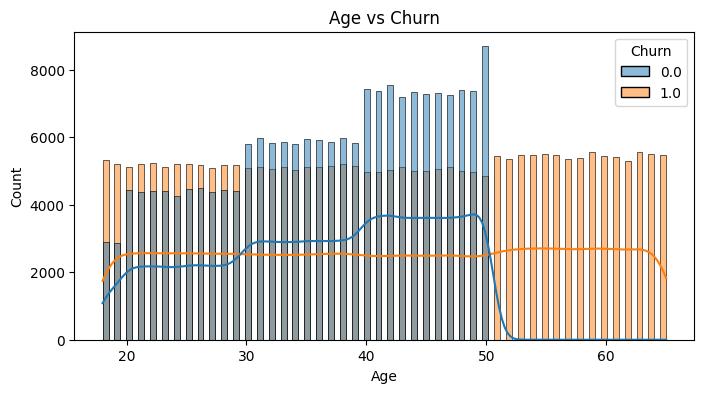

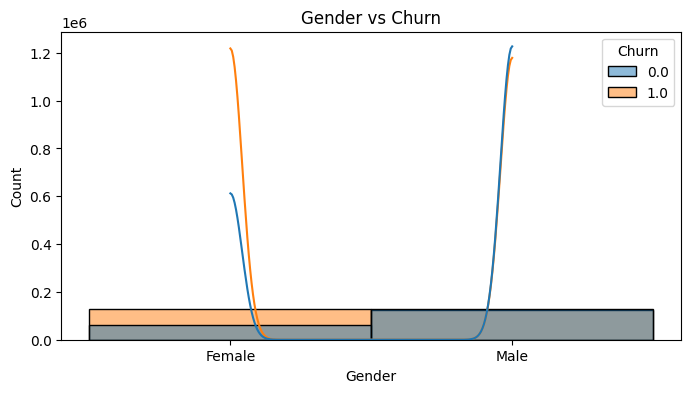

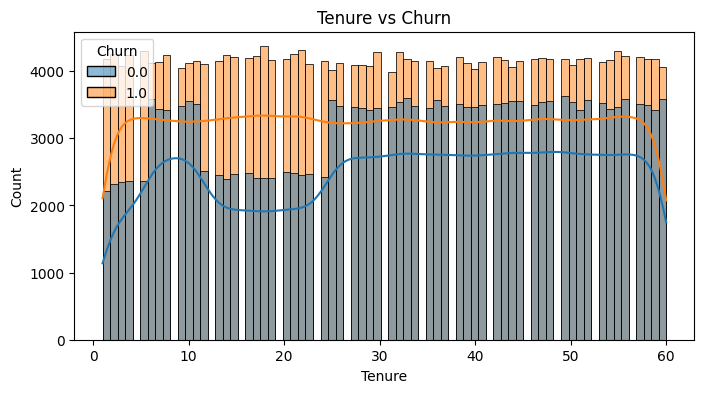

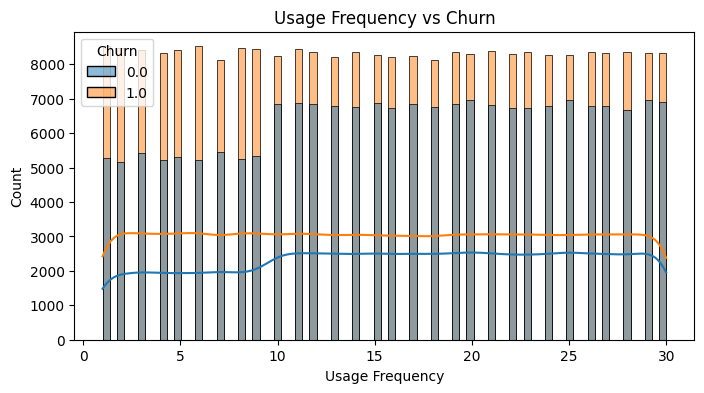

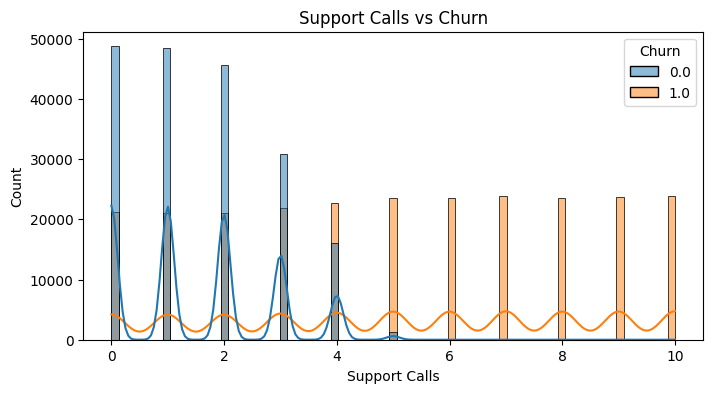

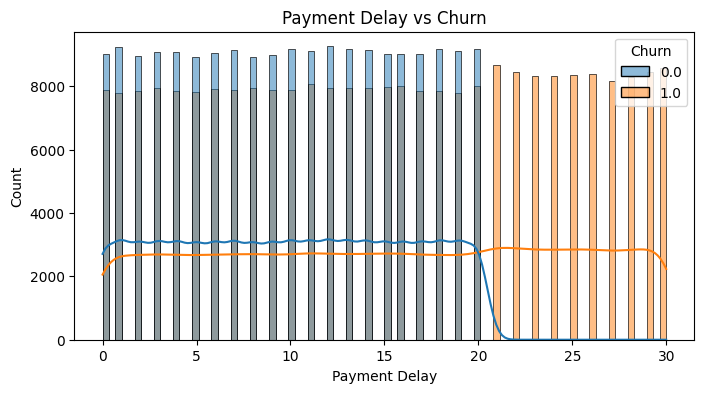

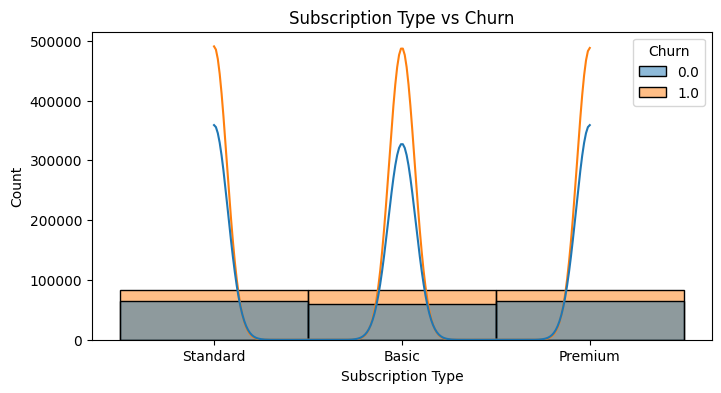

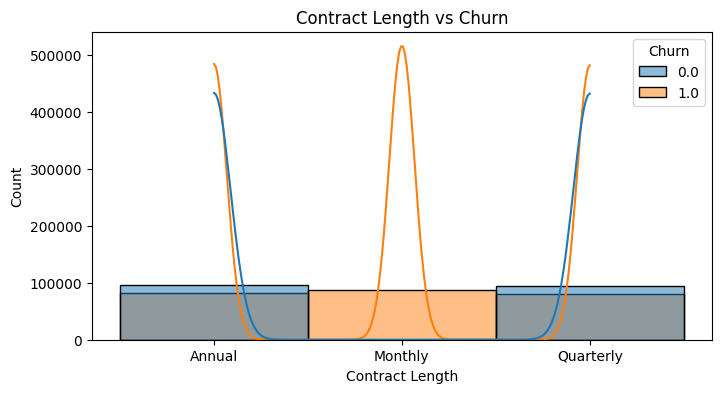

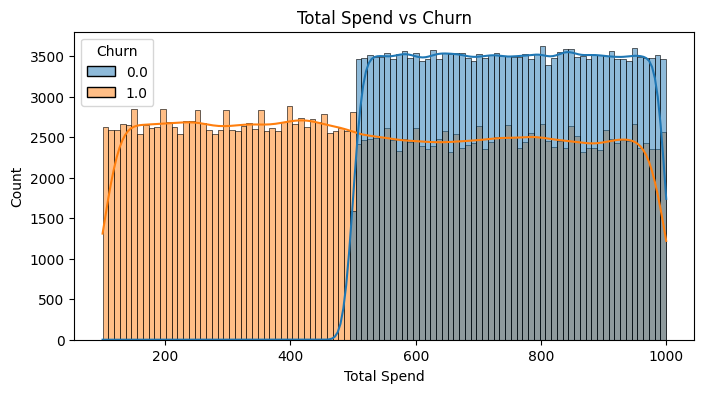

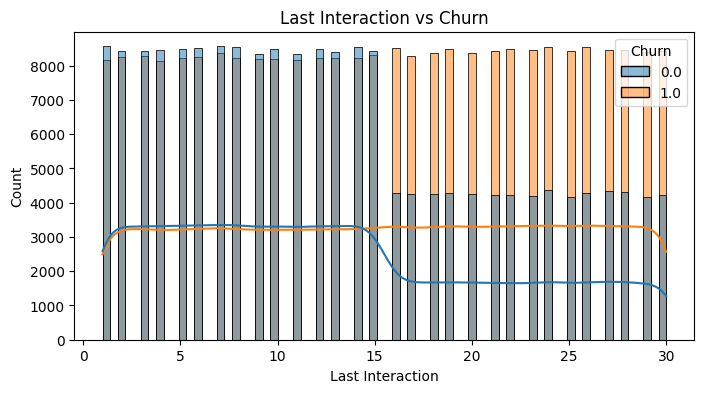

In [12]:
# List of columns
columns = train_df.drop(columns='Churn').columns

# create histograms for Churn vs each of the columns
for column in columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=train_df, x=column, hue='Churn', kde=True)
    plt.title(f'{column} vs Churn')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

## Feature Engineering

## Encoding Categorical Data

In [14]:
# One-Hot Encoding for 'Gender'
train_df = pd.get_dummies(train_df, columns=['Gender'], drop_first=True)
test_df = pd.get_dummies(test_df, columns=['Gender'], drop_first=True)

# label encoding
encoder = LabelEncoder()

columns_to_encode = ['Subscription Type', 'Contract Length', 'Churn']

for column in columns_to_encode:
    train_df[column] = encoder.fit_transform(train_df[column])
    
for column in columns_to_encode:
    test_df[column] = encoder.fit_transform(test_df[column])

## Correlation Matrix & Heatmap

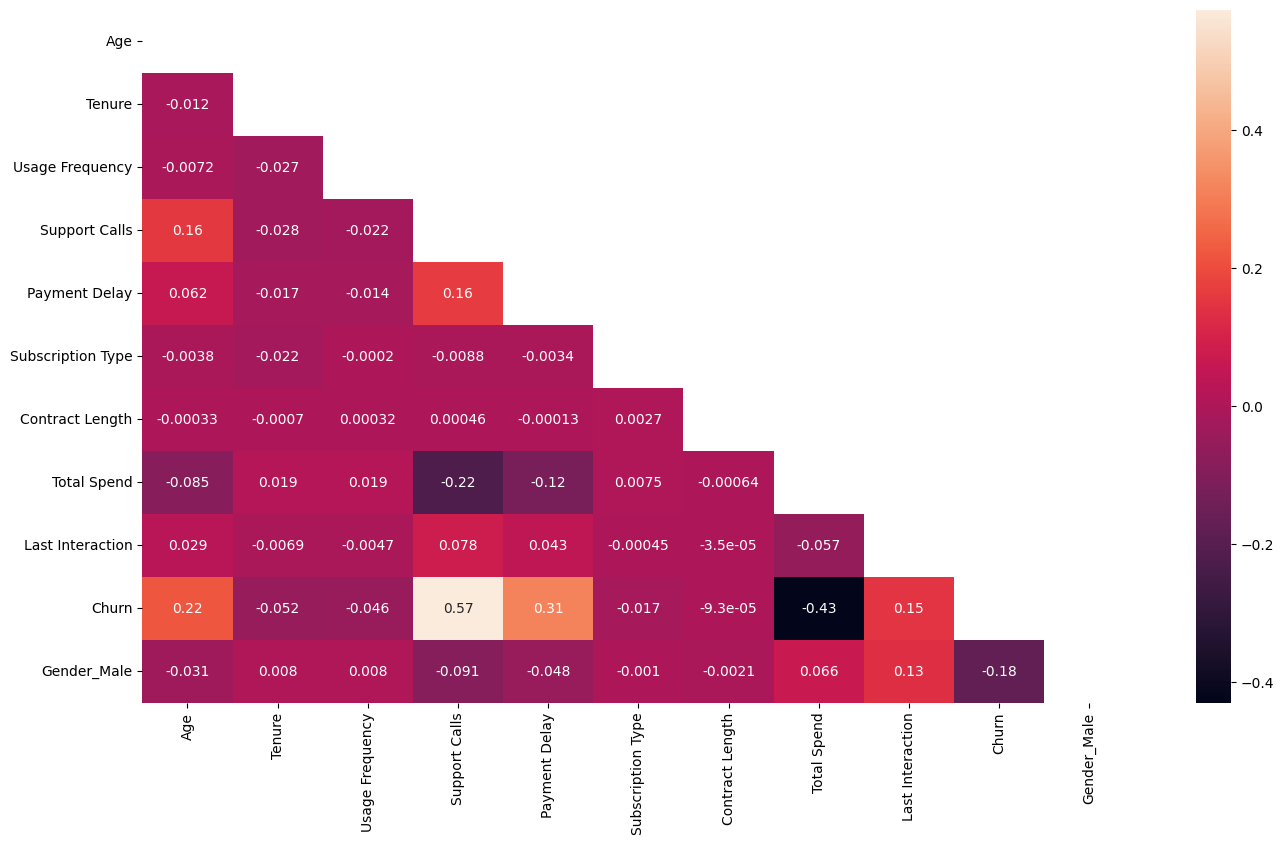

In [15]:
# create correlation matrix
corr = train_df.corr()

# Create a mask to hide the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# show heatmap
plt.figure(figsize=(16, 9))
sns.heatmap(corr, annot=True, mask=mask)
plt.show()

In [16]:
train_df.columns

Index(['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay',
       'Subscription Type', 'Contract Length', 'Total Spend',
       'Last Interaction', 'Churn', 'Gender_Male'],
      dtype='object')

In [17]:
# train_df = train_df.drop(columns=['Tenure', 'Usage Frequency', 'Subscription Type', 'Contract Length'])
train_df = train_df.drop(columns=['Contract Length'])

# test_df = test_df.drop(columns=['Tenure', 'Usage Frequency', 'Subscription Type', 'Contract Length'])
test_df = test_df.drop(columns=['Contract Length'])

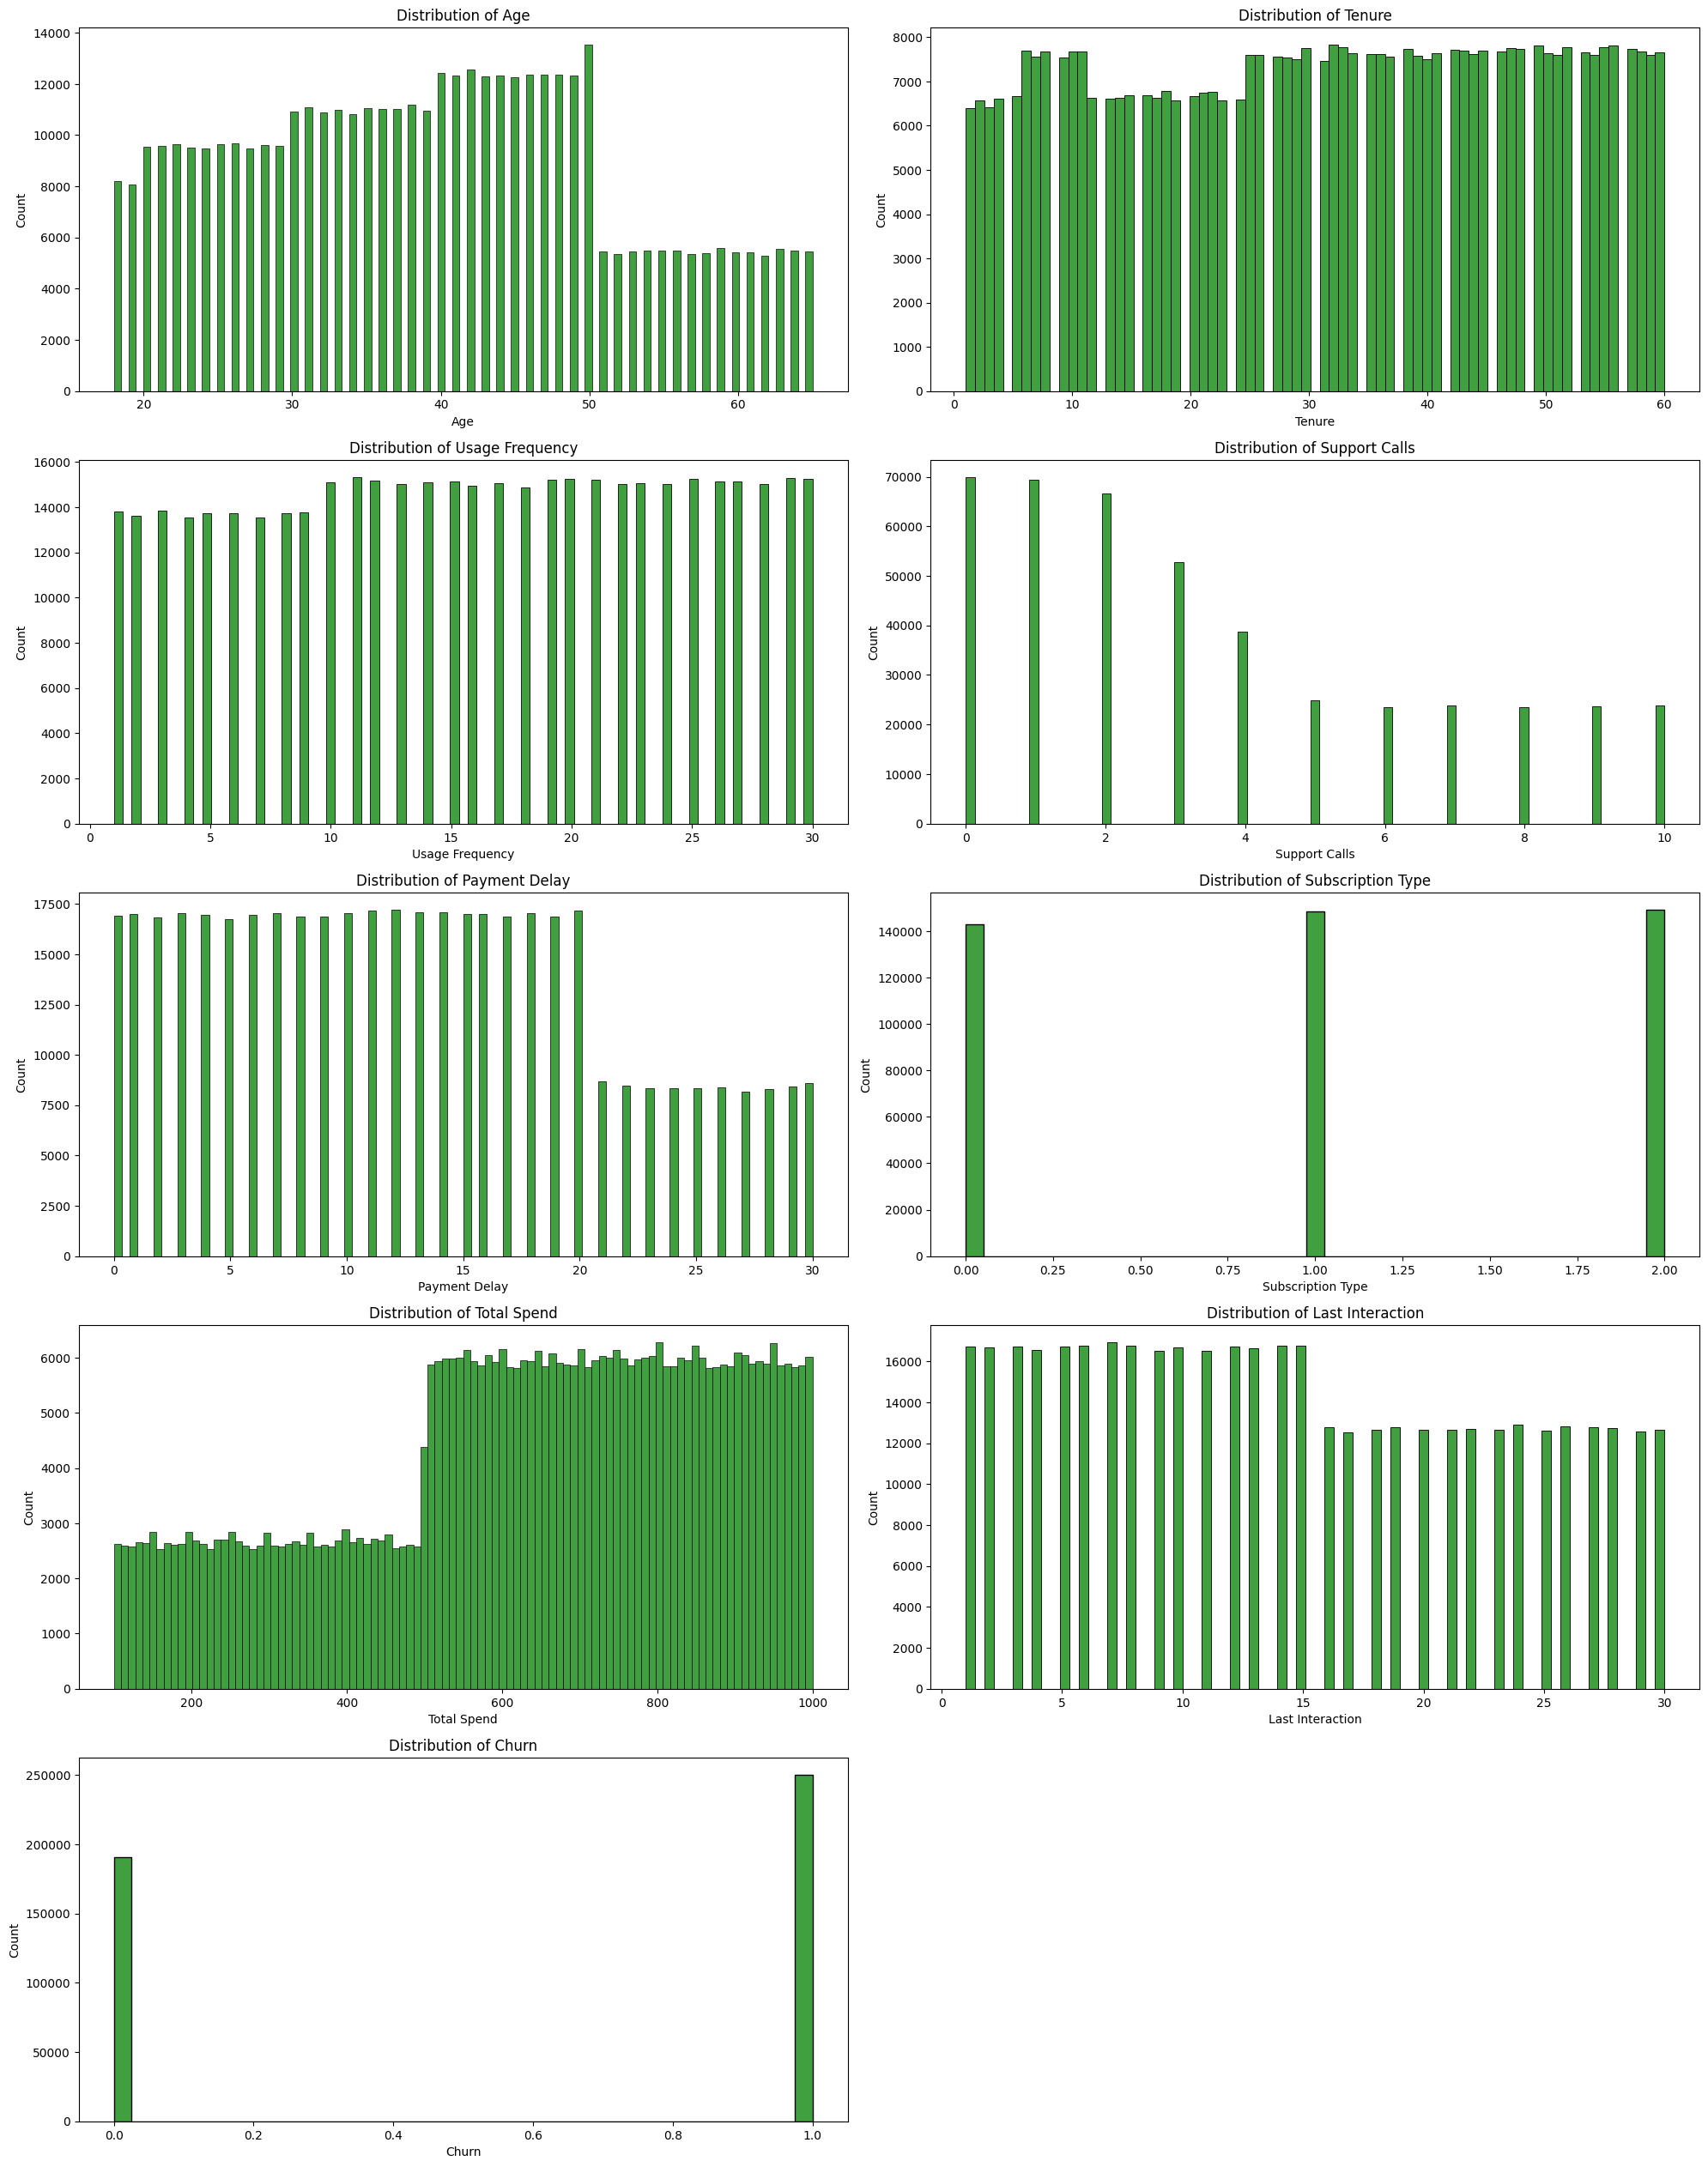

In [18]:
# Check distribution of column data

plt.figure(figsize=(20, 35))
numerical_columns = train_df.select_dtypes(include=['number']).columns
#columns = train_df.columns.tolist()

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(7, 2, i)
    sns.histplot(train_df[column], color="green")
    plt.title(f'Distribution of {column}')
    plt.ylim()

plt.tight_layout()
plt.show()

In [19]:
# train_df.columns

In [20]:
# column_skew = ['Age', 'Support Calls', 'Payment Delay', 'Total Spend', 'Last Interaction']

# for value in numerical_columns:
#     train_df[value] = np.log(1+train_df[value])
#     test_df[value]= np.log(1+test_df[value])

# plt.figure(figsize=(20, 50))

# for i, column in enumerate(numerical_columns, 1):
#     plt.subplot(7, 2, i)
#     sns.histplot(train_df[column], color="green")
#     plt.title(f'Distribution of {column}')
#     plt.ylim()

# plt.tight_layout()
# plt.show()

## Split The Training Dataset

In [21]:
# define input features and label 
X_train = train_df.drop(columns=['Churn'])
y_train = train_df['Churn']

X_test = test_df.drop(columns=['Churn'])
y_test = test_df['Churn']
#print(type(y))

# split the train_df
X_temp, X_val, y_temp, y_val = train_test_split(X_test, y_test, test_size=0.5, stratify=y_test, random_state=42)

## Feature Scaling

In [22]:
# initiate standard scaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_temp = sc.transform(X_temp)
X_val = sc.transform(X_val)

In [23]:
X_train

array([[-0.7533263 ,  0.44875958, -0.21051068, ...,  1.2474268 ,
         0.29305188, -1.14590897],
       [ 2.05964592,  1.02827797, -1.7245625 , ..., -0.30986452,
        -0.98658361, -1.14590897],
       [ 1.25593957, -1.00003639, -1.37516593, ..., -1.85469752,
        -1.33557511, -1.14590897],
       ...,
       [-1.07480884,  0.21695223,  1.30354113, ...,  1.43558912,
        -0.63759211,  0.87266967],
       [-0.91406757,  1.37598901, -0.21051068, ..., -0.12070554,
        -1.45190561,  0.87266967],
       [-0.67295566,  0.97032613,  0.48828246, ..., -0.26513912,
         0.75837388,  0.87266967]])

In [24]:
X_val

array([[ 0.69334513,  1.02827797,  0.02242036, ...,  0.59959361,
         0.75837388, -1.14590897],
       [-0.67295566, -0.30461432, -0.32697621, ..., -0.87464218,
        -0.75392261, -1.14590897],
       [-1.47666201, -0.07280697,  0.95414456, ..., -0.5299617 ,
         0.29305188, -1.14590897],
       ...,
       [ 1.49705148,  0.9123743 , -1.2587004 , ..., -0.92032272,
        -1.33557511,  0.87266967],
       [ 1.65779275, -0.47846984, -0.55990726, ..., -2.10801691,
        -0.75392261,  0.87266967],
       [ 1.73816338,  1.14418165, -0.67637278, ...,  0.00989929,
         0.87470438, -1.14590897]])

# Model Selection

In [25]:
# we will use lazypredict to find the perfect model. check the full list of classifier models 
lazypredict.Supervised.CLASSIFIERS

[('AdaBoostClassifier', sklearn.ensemble._weight_boosting.AdaBoostClassifier),
 ('BaggingClassifier', sklearn.ensemble._bagging.BaggingClassifier),
 ('BernoulliNB', sklearn.naive_bayes.BernoulliNB),
 ('CalibratedClassifierCV', sklearn.calibration.CalibratedClassifierCV),
 ('CategoricalNB', sklearn.naive_bayes.CategoricalNB),
 ('DecisionTreeClassifier', sklearn.tree._classes.DecisionTreeClassifier),
 ('DummyClassifier', sklearn.dummy.DummyClassifier),
 ('ExtraTreeClassifier', sklearn.tree._classes.ExtraTreeClassifier),
 ('ExtraTreesClassifier', sklearn.ensemble._forest.ExtraTreesClassifier),
 ('GaussianNB', sklearn.naive_bayes.GaussianNB),
 ('KNeighborsClassifier',
  sklearn.neighbors._classification.KNeighborsClassifier),
 ('LabelPropagation',
  sklearn.semi_supervised._label_propagation.LabelPropagation),
 ('LabelSpreading', sklearn.semi_supervised._label_propagation.LabelSpreading),
 ('LinearDiscriminantAnalysis',
  sklearn.discriminant_analysis.LinearDiscriminantAnalysis),
 ('Linear

In [26]:
# select the models to test
lazypredict.Supervised.CLASSIFIERS = lazypredict.Supervised.CLASSIFIERS[0:17] + lazypredict.Supervised.CLASSIFIERS[19:25]

# check the list again
lazypredict.Supervised.CLASSIFIERS

[('AdaBoostClassifier', sklearn.ensemble._weight_boosting.AdaBoostClassifier),
 ('BaggingClassifier', sklearn.ensemble._bagging.BaggingClassifier),
 ('BernoulliNB', sklearn.naive_bayes.BernoulliNB),
 ('CalibratedClassifierCV', sklearn.calibration.CalibratedClassifierCV),
 ('CategoricalNB', sklearn.naive_bayes.CategoricalNB),
 ('DecisionTreeClassifier', sklearn.tree._classes.DecisionTreeClassifier),
 ('DummyClassifier', sklearn.dummy.DummyClassifier),
 ('ExtraTreeClassifier', sklearn.tree._classes.ExtraTreeClassifier),
 ('ExtraTreesClassifier', sklearn.ensemble._forest.ExtraTreesClassifier),
 ('GaussianNB', sklearn.naive_bayes.GaussianNB),
 ('KNeighborsClassifier',
  sklearn.neighbors._classification.KNeighborsClassifier),
 ('LabelPropagation',
  sklearn.semi_supervised._label_propagation.LabelPropagation),
 ('LabelSpreading', sklearn.semi_supervised._label_propagation.LabelSpreading),
 ('LinearDiscriminantAnalysis',
  sklearn.discriminant_analysis.LinearDiscriminantAnalysis),
 ('Linear

In [27]:
clf = LazyClassifier(verbose= 1,ignore_warnings=True, custom_metric= None)
models, predictions = clf.fit(X_train, X_temp, y_train, y_temp)
models

* As we can see, NearestCentroid model does better than the other models

In [28]:
# tune the model with the X_val and y_val that we kept separately 

# Create an instance of the NearestCentroid classifier
nc = NearestCentroid()

# Define the hyperparameter grid to search
param_grid = {
    'shrink_threshold': [None, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

}


# Create a GridSearchCV instance
grid_search = GridSearchCV(nc, param_grid, cv=10)

# Fit the grid search to your training data
grid_search.fit(X_train, y_train)

# Get the best estimator (model) and its hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions on test data using the best model
y_pred = best_model.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
print("Best Model Accuracy:", accuracy)

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

Best Model Accuracy: 0.6194737005623389
Best Hyperparameters: {'shrink_threshold': 1.0}


* The accuracy is still low. I will attempt to improve the results by revisiting the preprocessing steps and, if possible, performing some feature engineering. Feel free to give suggestions to get better result!